In [1]:
using Distributions
using Optim
using QuadGK
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(500, 300))

$X,Y\sim\mathrm{Uniform}(0,1)$ が独立ならば $Z=X/Y$ が従う分布の密度函数は次になる:

$$
f(z) = \begin{cases}
0 & (z < 0) \\
1/2 & (0\le z\le 1) \\
1/(2z^2) & (1 \le z) \\
\end{cases}
$$

In [2]:
f(z) = z < 0 ? 0.0 : 0 ≤ z ≤ 1 ? 1/2 : 1/(2z^2)
quadgk(f, 0, 1, Inf)

(1.0, 4.226984873234585e-10)

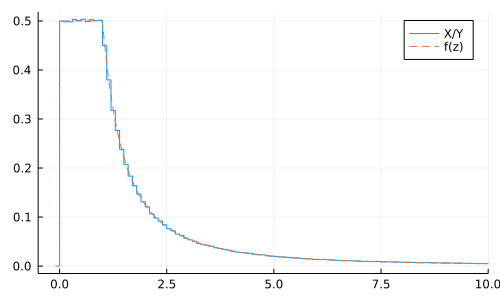

In [3]:
n = 10^6
X = rand(Uniform(0, 1), n)
Y = rand(Uniform(0, 1), n)
Z = X ./ Y
stephist(Z; norm=true, bin=[0:0.1:30; Inf], label="X/Y")
plot!(f, -0.1, 30; label="f(z)", xlim=(-0.5, 10), ls=:dash)

$X,Y\sim\mathrm{Uniform}(-1,1)$ が独立ならば $Z=X/Y$ が従う分布の密度函数は次になる:

$$
g(z) = \begin{cases}
1/4 & (|z|\le 1) \\
1/(4z^2) & (1 \le |z|) \\
\end{cases}
$$

In [4]:
g(z) = abs(z) ≤ 1 ? 1/4 : 1/(4z^2)
quadgk(f, -Inf, -1, 0, 1, Inf)

(1.0000000000000004, 1.4465360298476782e-8)

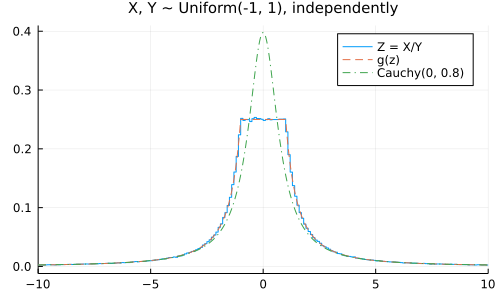

In [5]:
n = 10^6
X = rand(Uniform(-1, 1), n)
Y = rand(Uniform(-1, 1), n)
Z = X ./ Y
stephist(Z; norm=true, bin=[-Inf; -30:0.1:30; Inf], label="Z = X/Y")
plot!(g, -30, 30; label="g(z)", xlim=(-10, 10), ls=:dash)
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  0.358717 seconds (1.60 M allocations: 84.407 MiB, 4.79% gc time, 77.51% compilation time)


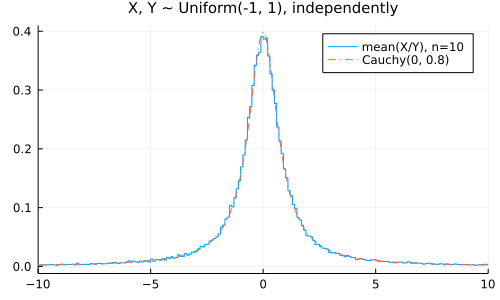

In [6]:
n, L = 10, 10^5
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  0.211932 seconds (757.72 k allocations: 38.076 MiB, 8.30% gc time, 51.82% compilation time)


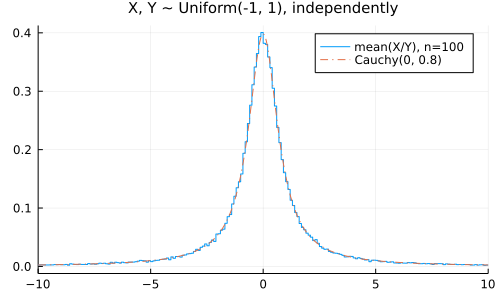

In [7]:
n, L = 100, 10^5
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  0.438767 seconds (757.70 k allocations: 38.074 MiB, 3.25% gc time, 22.44% compilation time)


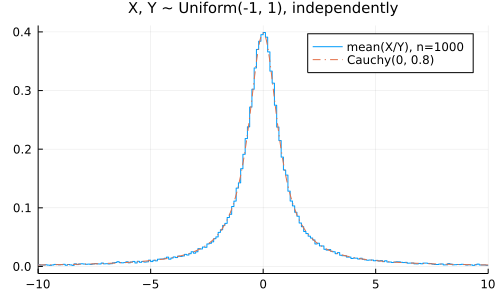

In [8]:
n, L = 1000, 10^5
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  2.741884 seconds (757.71 k allocations: 38.075 MiB, 0.52% gc time, 3.46% compilation time)


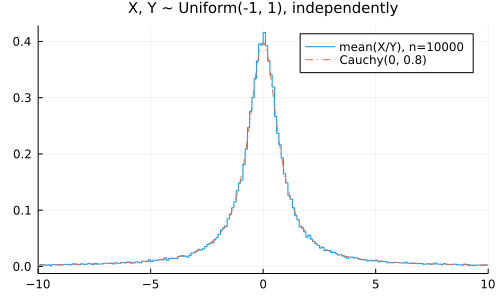

In [9]:
n, L = 10000, 10^5
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

In [10]:
n = 10^6
X = rand(Uniform(-1, 1), n)
Y = rand(Uniform(-1, 1), n)
Z = X ./ Y

o = optimize(w -> -loglikelihood(Cauchy(w...), Z), [0.0, 1.0])
@show o
@show o.minimizer;

o =  * Status: success

 * Candidate solution
    Final objective value:     2.408981e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    44
    f(x) calls:    85

o.minimizer = [0.0007046226211174742, 0.9999224997854563]


In [11]:
n, L = 10^4, 10^6
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

@time o = optimize(w -> -loglikelihood(Cauchy(w...), meanZ), [0.0, 1.0])
@show o
@show o.minimizer;

 26.835447 seconds (6.16 M allocations: 305.866 MiB, 0.60% gc time, 0.38% compilation time)
  1.680076 seconds (7.01 k allocations: 387.938 KiB, 0.34% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.290424e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    41
    f(x) calls:    85

o.minimizer = [0.0006085017430808662, 0.7864938639382512]
